* Implementation of KNN algorithm. *



In [1]:
# Importing the necessary libraries.
import heapq
import pandas  as pd
import numpy as np
from sklearn import datasets
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load Iris Dataset
iris = datasets.load_iris()
X = iris.data  
y = iris.target

feature_idxs = [1, 3] 

feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
xlbl, ylbl = feature_names[feature_idxs[0]], feature_names[feature_idxs[1]] 

X_trn_, X_test_, y_trn, y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.33, 
                                                 random_state=0,
                                                 stratify=y)
X_trn, X_test = X_trn_[:, feature_idxs], X_test_[:, feature_idxs]

print("X_trn.shape = {}, X_test.shape = {}".format(X_trn.shape, X_test.shape))
print("Features: {}, {}".format(feature_names[feature_idxs[0]], feature_names[feature_idxs[1]]))

X_trn.shape = (100, 2), X_test.shape = (50, 2)
Features: Sepal Width, Petal Width


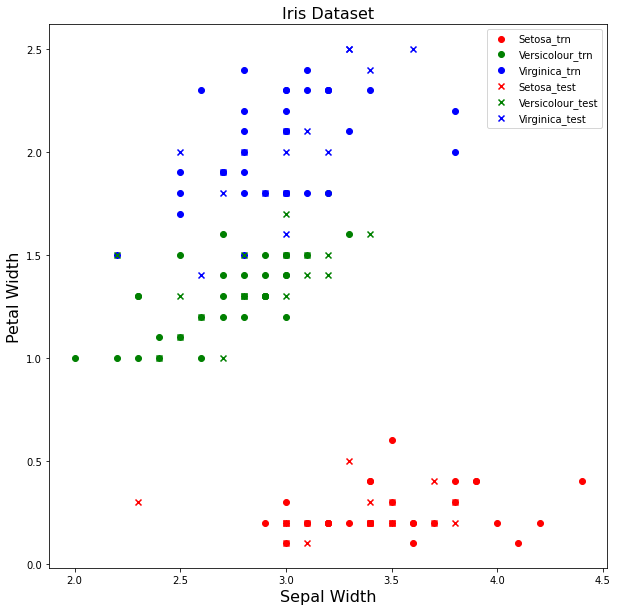

In [3]:
# a scatterplot displaying each species based on sepal length (x axis) and sepal length (y axis)
colours = ['red', 'green', 'blue']
legend = ['Setosa', 'Versicolour', 'Virginica']
classes = list(set(y))
f = plt.figure(figsize=(10, 10))
for i in classes:
    idx = np.where(y_trn == classes[i])
    plt.scatter(X_trn[idx, 0], 
                X_trn[idx, 1], 
                c=colours[i], 
                label=legend[i] + '_trn')

for i in classes:
    idx = np.where(y_test == classes[i])
    plt.scatter(X_test[idx, 0], 
                X_test[idx, 1], 
                c=colours[i], 
                label=legend[i] + '_test',
                marker='x')
    
    
plt.legend()
plt.title('Iris Dataset', fontsize=16)
plt.xlabel(xlbl, fontsize=16)
plt.ylabel(ylbl, fontsize=16)
plt.show()

In [4]:
# Coding the class structure
class KNN:
    # Defining the data we will use in the class
    def __init__ (self, X, k= 5):
        self.X = X[X.columns[:-1]].values
        self.y = X[X.columns[ -1]].values
        self.k = k
    
    
    def __distance(self, object_1, object_2):
        return distance.euclidean(object_1, object_2)

    

    def predict(self , data):
        self.data = data 
        distance = []
        counter_row = 0 
    
        for i in self.X:
            dst = self.__distance(self.data, i )
            heapq.heappush(distance,(dst, self.y[counter_row])) 
            counter_row += 1 

        liste = [0,0,0]
        chech_list = distance[0 : self.k]
        self.MAX_ELEMENT = -1
        self.MAX_NUMBER  = -1
        for i in chech_list:
            if(i[1] == 0): 
                liste[0]+=1
                if(liste[0] > self.MAX_NUMBER):
                    self.MAX_NUMBER  = liste[0]
                    self.MAX_ELEMENT = 0
            elif(i[1] == 1): 
                liste[1]+=1
                if(liste[1] > self.MAX_NUMBER):
                    self.MAX_NUMBER = liste[0]
                    self.MAX_ELEMENT = 1
            elif(i[1] == 2): 
                liste[2]+=1
                if(liste[2] > self.MAX_NUMBER):
                    self.MAX_NUMBER = liste[0]
                    self.MAX_ELEMENT = 2
        return self.MAX_ELEMENT

In [5]:
def main():
    iris =  datasets.load_iris()
    data = pd.DataFrame(iris.data)
    data["target"]= iris.target
    data = data.sample(frac=1).reset_index(drop=True)

    df       = data[0 : int(len(data)*(3/5))]
    df_test  = data[int(len(data)*(3/5))+1 : ]
    
    
    df_test_x = df_test[df_test.columns[:-1]].values
    df_test_y = df_test[df_test.columns[ -1]].values
    for k in range(3,12):
        model = KNN(df, k ) 
        resultant = []
        counter = 0 
        for i in df_test_x:
            resultat = resultant.append(model.predict(i))
            counter +=1 

        #control df_test_y    resultat
        controle = 0
        for i in range(len(resultant)):
            if (resultant[i] == df_test_y[i]):
                controle += 1

        print(f"k = {k} , succes rate = {(controle/len(resultant))*100}")

In [6]:
main()

k = 3 , succes rate = 93.22033898305084
k = 4 , succes rate = 96.61016949152543
k = 5 , succes rate = 91.52542372881356
k = 6 , succes rate = 93.22033898305084
k = 7 , succes rate = 89.83050847457628
k = 8 , succes rate = 86.4406779661017
k = 9 , succes rate = 89.83050847457628
k = 10 , succes rate = 93.22033898305084
k = 11 , succes rate = 93.22033898305084


### Using Sklearn just for comparision purpose

In [7]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(3,12):
    knn = KNeighborsClassifier(n_neighbors = k)
    print(knn.fit(X_trn_,y_trn),end="\t Accuraccy : ")
    print(knn.score(X_test_,y_test))

KNeighborsClassifier(n_neighbors=3)	 Accuraccy : 1.0
KNeighborsClassifier(n_neighbors=4)	 Accuraccy : 1.0
KNeighborsClassifier()	 Accuraccy : 0.98
KNeighborsClassifier(n_neighbors=6)	 Accuraccy : 0.98
KNeighborsClassifier(n_neighbors=7)	 Accuraccy : 0.98
KNeighborsClassifier(n_neighbors=8)	 Accuraccy : 1.0
KNeighborsClassifier(n_neighbors=9)	 Accuraccy : 0.98
KNeighborsClassifier(n_neighbors=10)	 Accuraccy : 0.96
KNeighborsClassifier(n_neighbors=11)	 Accuraccy : 0.98


##### Conclusion

- Thus, from this experiment I executed the KNN Algorithm forvalues of k from 3 to 11 and
  predicted the accuracy the highest being 96.61% with K=4.

